# Project Name : "Crop Prediction According To Soil and Weather"

By : Renuka Gaikwad

In [43]:
# Description :

In this project, an optimistic attempt has been made to support farmers; with the purpose to improve 
their farming productivity. Additionally, for doing so, a forecasting model has been developed by the 
use of machine learning; which can direct us, which crop will be best suitable for a specific climatic condition.

In [44]:
#############################################################################################################################

Meaning of This Terms
•	N = Nitrogen
•	P = Phosphorous
•	K = Potassium
•	Ph = A scale used to identify acidity or basicity nature; (Acid Nature- Ph<7; Neutral- Ph=7; Base Nature-P>7)
•	label = Types of Crop (Rice,Maize, Chickpea; Kidney beans; pigeonpeas; mothbeans; mungbean;blackgram; lentil; pomegranate; 
                       banana; mango; grapes; watermelon; muskmelon; apple; orange;papaya; coconut; cotton; jute; coffee)


In [45]:
# Import The Library

In [46]:
#for Data Manipulation
import pandas as pd

#for complex Mathematical Operations
import numpy as np

#for Creating Data Visulization
import matplotlib.pyplot as plt
import seaborn as sns

#for interactive analysis & also helps in interacting with python
from ipywidgets import interact

In [47]:
#Loading the Data Set
df = pd.read_csv(r'C:\Users\renuk\OneDrive\Desktop\code\Agricultural_Production\agriculture_data.csv', sep = ',')

df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [48]:
##To Find the number of rows and columns of the data

df.shape

(2200, 8)

here data contains 2200-rows and 8-columns

In [49]:
##Checking the first 10 row of the data set

df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [50]:
## Column name and their data type
df.info()

#df.dtypes 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [51]:
## Statistical detail of data

df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [52]:
## Cheching the null or any missing value in every column of data

df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [53]:
## Now we check what are he unique values in label of column

df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [54]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [55]:
##Suitable average climatic conditions needed by soil for crop production
print("Average Ratio of Nitrogen in the soil : {0:.2f}".format(df['N'].mean()))
print("Average Ratio of Phosphorous in the soil : {0:.2f}".format(df['P'].mean()))
print("Average Ratio of Potassium in the soil : {0:.2f}".format(df['K'].mean()))
print("Average Ratio of Temperature in celsius : {0:.2f}".format(df['temperature'].mean()))
print("Average Ratio of Humidity in % : {0:.2f}".format(df['humidity'].mean()))
print("Average Ratio of ph in the soil : {0:.2f}".format(df['ph'].mean()))
print("Average Ratio of Rainfall in mm : {0:.2f}".format(df['rainfall'].mean()))



Average Ratio of Nitrogen in the soil : 50.55
Average Ratio of Phosphorous in the soil : 53.36
Average Ratio of Potassium in the soil : 48.15
Average Ratio of Temperature in celsius : 25.62
Average Ratio of Humidity in % : 71.48
Average Ratio of ph in the soil : 6.47
Average Ratio of Rainfall in mm : 103.46


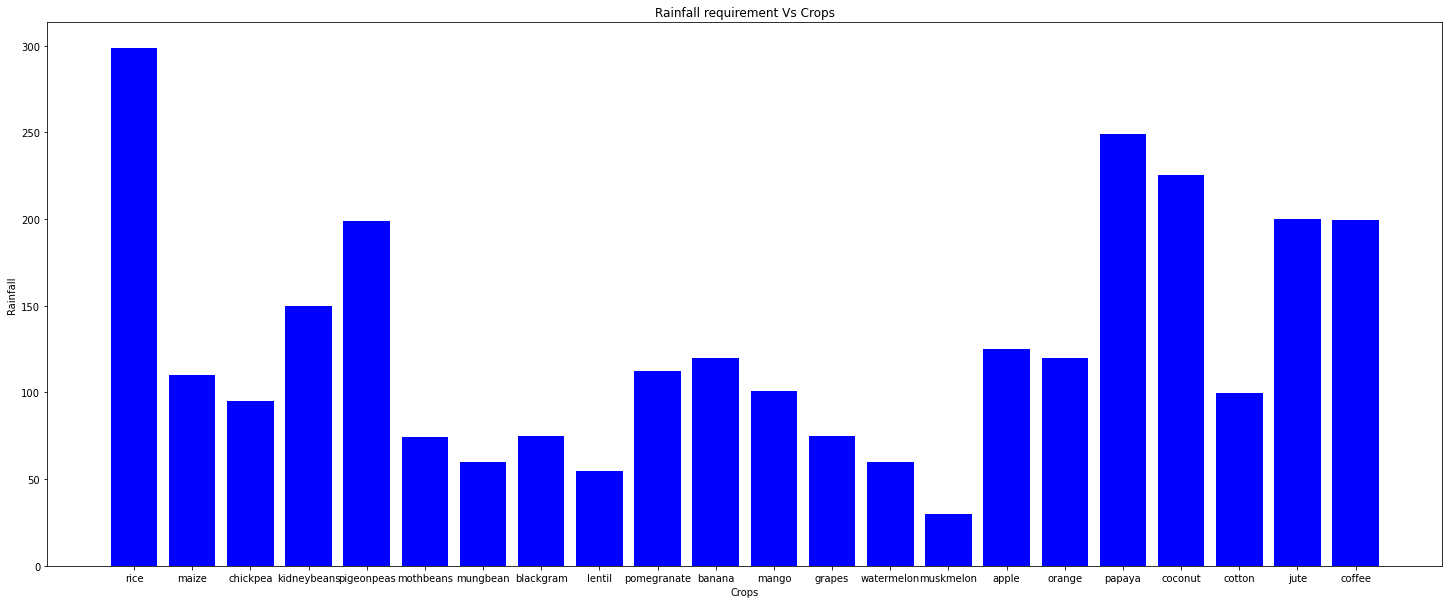

In [56]:
## Plot the Rainfall requirements Vs Crops

plt.figure(figsize=(25,10))
plt.bar(df['label'],(df['rainfall']),color=['Blue'])
plt.xlabel('Crops')
plt.title('Rainfall requirement Vs Crops')
plt.ylabel('Rainfall')
plt.show()

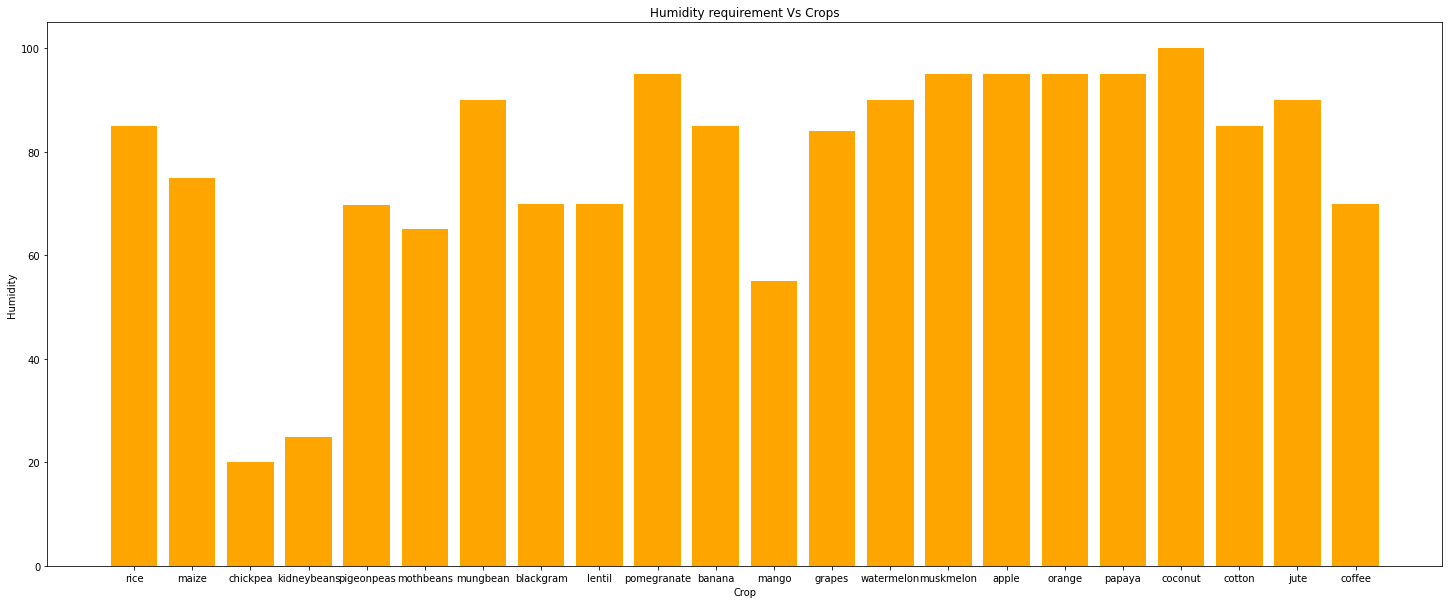

In [57]:
## Plot the Humidity requirement Vs Crops
plt.figure(figsize=(25,10))
plt.bar(df['label'],(df['humidity']), color=['Orange'])
plt.xlabel('Crop')
plt.ylabel('Humidity')
plt.title("Humidity requirement Vs Crops")
plt.show()


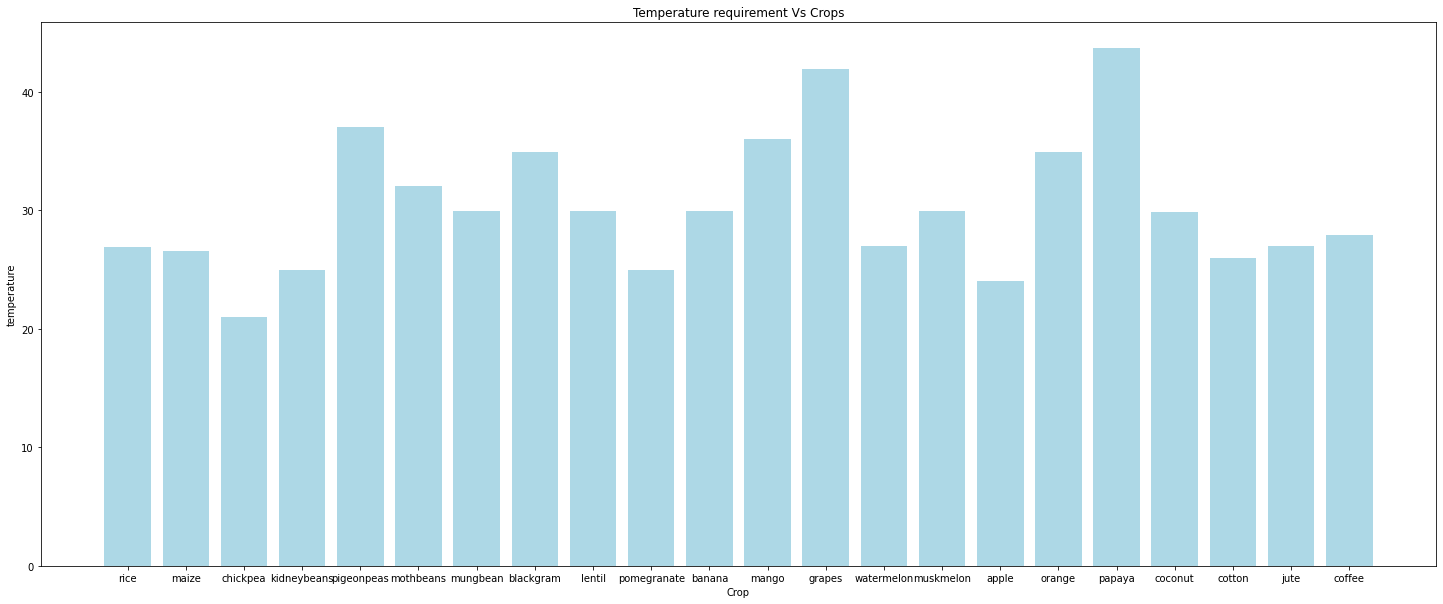

In [58]:
## Plot the Temperature requirement Vs Crops

plt.figure(figsize=(25,10))
plt.bar(df['label'],(df['temperature']), color=['Lightblue'])
plt.xlabel('Crop')
plt.ylabel('temperature')
plt.title("Temperature requirement Vs Crops")
plt.show()


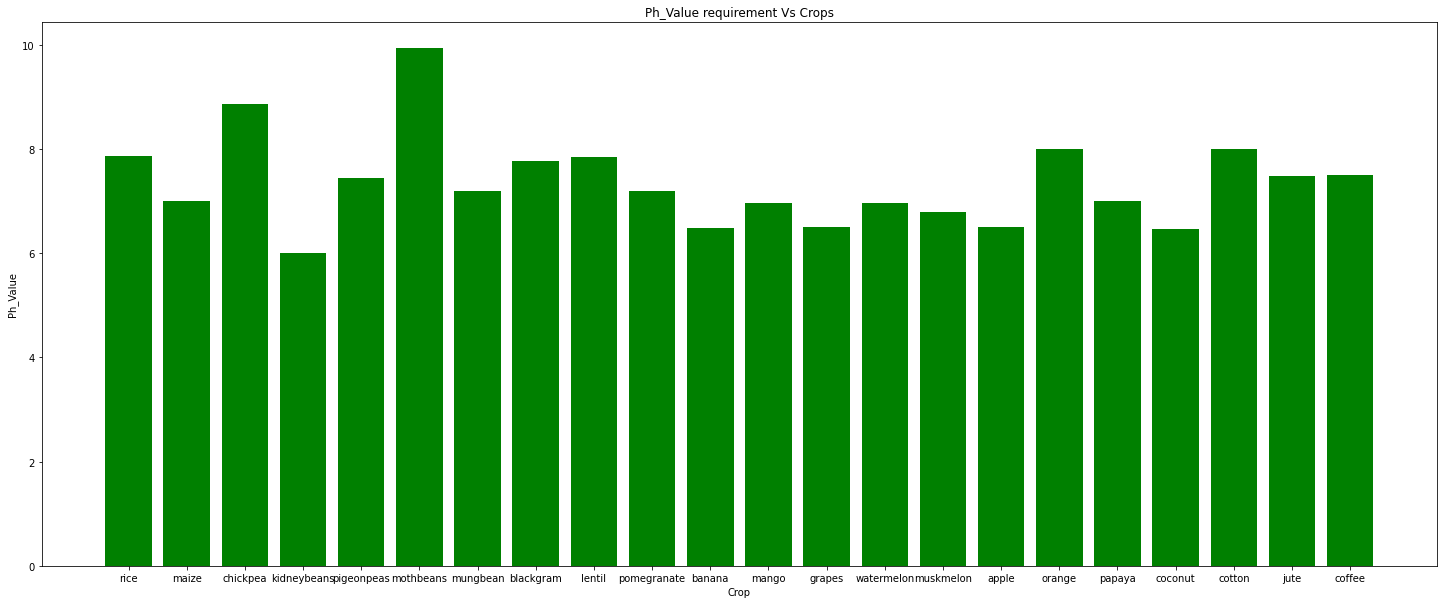

In [59]:
## Plot the Ph_Value Requirement VS Crops

plt.figure(figsize=(25,10))
plt.bar(df['label'],(df['ph']), color=['Green'])
plt.xlabel('Crop')
plt.ylabel('Ph_Value')
plt.title("Ph_Value requirement Vs Crops")
plt.show()


In [63]:
## Use of Interactive function from ipywidget library to find the best optimum climatic condition for any specific crop

@interact
def summary(crops = list(df.label.value_counts().index)):
  x= df[df.label == crops]
  print("___________________________________________________")
    
  print("Statistic of Nitrogen :")
  print("Minimum Nitrogen required :",x['N'].min())
  print("Average Nitrogen required :",x['N'].mean())
  print("Mximum Nitrogen required :",x['N'].max())
    
  print("___________________________________________________")

  print("Statistic of Phosphorous :")
  print("Minimum Phosphorous required :",x['P'].min())
  print("Average Phosphorous required :",x['P'].mean())
  print("Mximum Phosphorous required :",x['P'].max())

  print("___________________________________________________")
    
  print("Statistic of Potassium :")
  print("Minimum Potassium required :",x['K'].min())
  print("Average Potassium required :",x['K'].mean())
  print("Mximum Potassium required :",x['K'].max())
    
  print("___________________________________________________")

  print("Statistic of Temperature :")
  print("Minimum Temperature required :",x['temperature'].min())
  print("Average Temperature required :",x['temperature'].mean())
  print("Mximum Temperature required :",x['temperature'].max())

  print("___________________________________________________")
    
  print("Statistic of Humidity :")
  print("Minimum Humidity required :",x['humidity'].min())
  print("Average Humidity required :",x['humidity'].mean())
  print("Mximum Humidity required :",x['humidity'].max())
    
  print("___________________________________________________")

  print("Statistic of ph :")
  print("Minimum ph required :",x['ph'].min())
  print("Average ph required :",x['ph'].mean())
  print("Mximum ph required :",x['ph'].max())

  print("___________________________________________________")
    
  print("Statistic of Rainfall :")
  print("Minimum Rainfall required :",x['rainfall'].min())
  print("Average Rainfall required :",x['rainfall'].mean())
  print("Mximum Rainfall required :",x['rainfall'].max())
    
  print("___________________________________________________")

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [64]:
## Comparing the requirement of soil minerals and weather conditins of differnt crops


@interact 
def compare(conditions = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
  print("Average value for ",conditions, "is {0:.2f}".format(df[conditions].mean()))
  print("_____________________________________________________________________________")
  print("Rice : {0:.2f}".format(df[(df['label'] == 'rice')][conditions].mean()))
  print("maize : {0:.2f}".format(df[(df['label'] == 'maize')][conditions].mean()))
  print("chickpea : {0:.2f}".format(df[(df['label'] == 'chickpea')][conditions].mean()))
  print("kidneybeans : {0:.2f}".format(df[(df['label'] == 'kidneybeans')][conditions].mean()))
  print("pigeonpeas : {0:.2f}".format(df[(df['label'] == 'pigeonpeas')][conditions].mean()))
  print("mothbeans : {0:.2f}".format(df[(df['label'] == 'mothbeans')][conditions].mean()))
  print("mungbean : {0:.2f}".format(df[(df['label'] == 'mungbean')][conditions].mean()))
  print("blackgram : {0:.2f}".format(df[(df['label'] == 'blackgram')][conditions].mean()))
  print("lentil : {0:.2f}".format(df[(df['label'] == 'lentil')][conditions].mean()))
  print("pomegranate : {0:.2f}".format(df[(df['label'] == 'pomegranate')][conditions].mean()))
  print("banana : {0:.2f}".format(df[(df['label'] == 'banana')][conditions].mean()))
  print("mango : {0:.2f}".format(df[(df['label'] == 'mango')][conditions].mean()))
  print("grapes : {0:.2f}".format(df[(df['label'] == 'grapes')][conditions].mean()))
  print("watermelon : {0:.2f}".format(df[(df['label'] == 'watermelon')][conditions].mean()))
  print("muskmelon : {0:.2f}".format(df[(df['label'] == 'muskmelon')][conditions].mean()))
  print("apple : {0:.2f}".format(df[(df['label'] == 'apple')][conditions].mean()))
  print("orange : {0:.2f}".format(df[(df['label'] == 'orange')][conditions].mean()))
  print("papaya : {0:.2f}".format(df[(df['label'] == 'papaya')][conditions].mean()))
  print("coconut : {0:.2f}".format(df[(df['label'] == 'coconut')][conditions].mean()))
  print("cotton : {0:.2f}".format(df[(df['label'] == 'cotton')][conditions].mean()))
  print("jute : {0:.2f}".format(df[(df['label'] == 'jute')][conditions].mean()))
  print("coffee : {0:.2f}".format(df[(df['label'] == 'coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [65]:
## Identifying the crops which requires unusual or special weather and soil minerals


@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
  print("Crops which require greater than average", conditions,'\n')
  print(df[df[conditions] > df[conditions].mean()]['label'].unique())
    
  print('________________________________________________________________________________')

  print("Crops which require less than average", conditions,'\n')
  print(df[df[conditions] <= df[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

C:\Users\renuk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\renuk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\renuk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

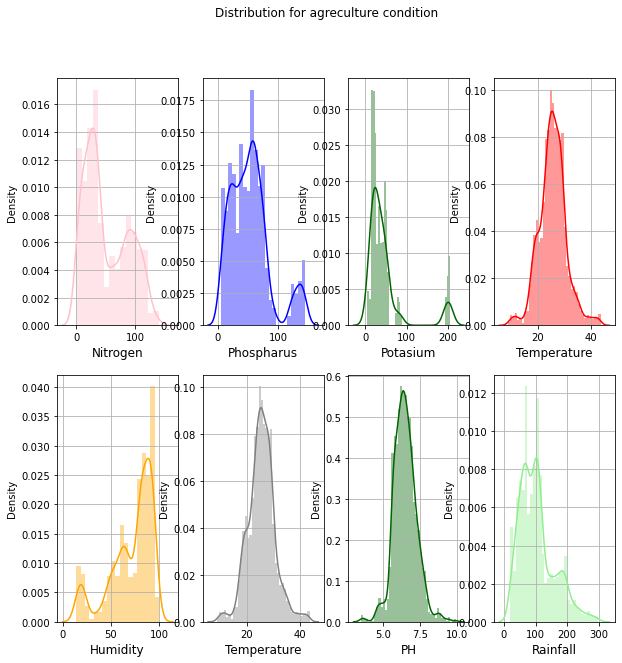

In [66]:
##Distribution plot of different climatic and weather conditions explaining the varriation in them

from numpy.core.fromnumeric import size

plt.subplot(2,4,1)
sns.distplot(df['N'], color = 'pink')
plt.xlabel('Nitrogen', fontsize=12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df['P'], color = 'blue')
plt.xlabel('Phospharus', fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df['K'], color = 'darkgreen')
plt.xlabel('Potasium', fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(df['temperature'], color = 'red')
plt.xlabel('Temperature', fontsize=12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(df['humidity'], color = 'orange')
plt.xlabel('Humidity', fontsize=12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(df['temperature'], color = 'gray')
plt.xlabel('Temperature', fontsize=12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(df['ph'], color = 'darkgreen')
plt.xlabel('PH', fontsize=12)
plt.grid()

plt.subplot(2,4,8)
sns.distplot(df['rainfall'], color = 'lightgreen')
plt.xlabel('Rainfall', fontsize=12)
plt.grid()

plt.suptitle("Distribution for agreculture condition")

plt.show()

In [67]:
## which crops require special climatic conditins

print("Some interasting pattern")
print("______________________________________________________________________________________")
print("Crops require high ratio of nitrogen contents in soil ", df[df['N']>120]['label'].unique())
print("Crops require high ratio of phospurus contents in soil ", df[df['P']>100]['label'].unique())
print("Crops require high ratio of nitrogen potassium in soil ", df[df['N']>200]['label'].unique())
print("Crops require high rain fall ", df[df['rainfall']>200]['label'].unique())
print("Crops require high temprature ", df[df['temperature']>40]['label'].unique())
print("Crops require high ph ", df[df['ph']>9]['label'].unique())

Some interasting pattern
______________________________________________________________________________________
Crops require high ratio of nitrogen contents in soil  ['cotton']
Crops require high ratio of phospurus contents in soil  ['grapes' 'apple']
Crops require high ratio of nitrogen potassium in soil  []
Crops require high rain fall  ['rice' 'papaya' 'coconut']
Crops require high temprature  ['grapes' 'papaya']
Crops require high ph  ['mothbeans']


In [68]:
## clasifiying the  crops as per their best productivity and sutability to the season

print("Summer crops")
print(df[(df['temperature'] > 30) & (df['humidity'] > 50)]['label'].unique())
print("_______________________________________")

print("Winter crops")
print(df[(df['temperature'] < 20) & (df['humidity'] > 30)]['label'].unique())
print("_______________________________________")

print("Winter crops")
print(df[(df['rainfall'] > 200) & (df['humidity'] > 30)]['label'].unique())
print("_______________________________________")

Summer crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
_______________________________________
Winter crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
_______________________________________
Winter crops
['rice' 'papaya' 'coconut']
_______________________________________


##Now, its time to find the crops which need similar climatic conditions and mineral requirements and club them together into a group by the help of "Clustering Analysis"

Clustering Analysis comes under unsupervised learning; means we train our model without labels

In [69]:
## here we using k- means clustaring 

from sklearn.cluster import KMeans

#Removing label of colukn
x= df.drop(['label'], axis=1)

#Selecting all the values for the data
X= x.values

print(x.shape)

(2200, 7)


C:\Users\renuk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\renuk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\renuk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\renuk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

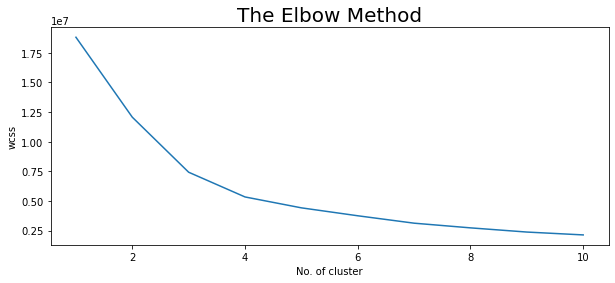

In [70]:
##Using Elbow Algorithm to find the optimum number of Clusters required

plt.rcParams['figure.figsize']=(10,4)

wcss=[]

for i in range(1, 11):
  km = KMeans(n_clusters = i, init= 'k-means++', max_iter= 300, n_init = 10, random_state=0)
  km.fit(x)
  wcss.append(km.inertia_)

#Result plotting
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No. of cluster')
plt.ylabel('wcss')
plt.show()

In [71]:
##There are two elbows first 3 & Second 4 always select the last Elbow: Hence our Cluster should be 4

In [72]:
## Lets implement k means algorithm to perform Clustering analysis
km = KMeans(n_clusters=4, init='k-means++', max_iter= 300, n_init= 10, random_state = 0)
y_means= km.fit_predict(x)

# Result
a= df['label']
y_means= pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis=1)
z = z.rename(columns = {0: 'cluster'})

#Check cluster of each crop
print("Lets check the result after applying  the K Means clustering analysis")
print("Crops in first cluster:", z[z['cluster']==0]['label'].unique())
print("___________________________________________________________________")
print("Crops in first cluster:", z[z['cluster']==1]['label'].unique())
print("___________________________________________________________________")
print("Crops in first cluster:", z[z['cluster']==2]['label'].unique())
print("___________________________________________________________________")
print("Crops in first cluster:", z[z['cluster']==3]['label'].unique())
print("___________________________________________________________________")

C:\Users\renuk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Lets check the result after applying  the K Means clustering analysis
Crops in first cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
___________________________________________________________________
Crops in first cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
___________________________________________________________________
Crops in first cluster: ['grapes' 'apple']
___________________________________________________________________
Crops in first cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
___________________________________________________________________


In [73]:
## We need to train our model without labels because if our model train both label, it may cheat and our accuracy declines
#So we drop labels from dataset

y=df['label']
x= df.drop(['label'], axis=1)


In [74]:
## Now its time to divide the data into two sets; train_data & test_data

##Lets create Training and Testing Sets for validation of Results

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)# 80% Data will be alotted into trainins set & remaining 20% will be sent into testing set

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\renuk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


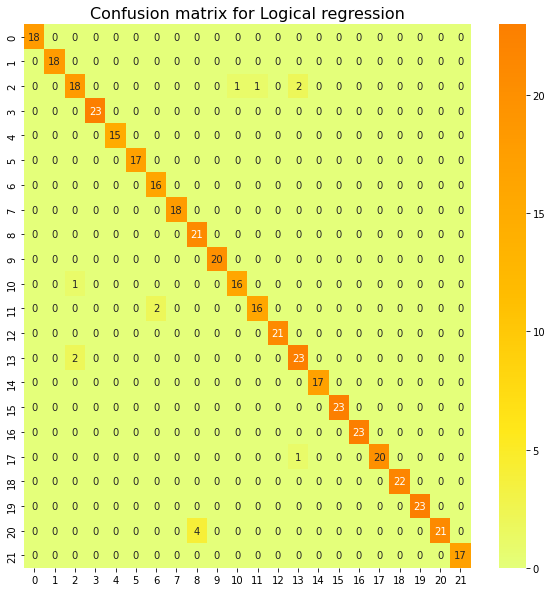

In [75]:
##Evaluate model performance
## We know the answer of the x_test data set have been stored into y_test, so to check the accuracy of the model, wew need to compare y_pred with y_test data, and to compare y_test with y_pred we use classification report

from sklearn.metrics import confusion_matrix

#Print confusion matrix first
plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, cmap= 'Wistia')
plt.title("Confusion matrix for Logical regression", fontsize = 16)
plt.show()

In [76]:
## Now print Classification report

from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    